# Case Study 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# standard libraries
import pandas as pd
import numpy as np
#import re
import os
from IPython.display import Image
#import sklearn
#import time

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
from IPython.display import clear_output

# data pre-processing
from scipy.io import arff
#from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit

# prediction models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

In [3]:
from scipy.io import arff
import pandas as pd
import numpy as np
import os

os.getcwd()

'C:\\Users\\parit\\Documents'

In [4]:
path = "C:\\Paritosh\\SMU\\7333 Quantifying the World\\Proj\\CS4\\"
os.chdir(path)
os.getcwd()

'C:\\Paritosh\\SMU\\7333 Quantifying the World\\Proj\\CS4'

In [5]:
from os import listdir
from os.path import isfile, join
dir_files = [f for f in os.listdir(os.getcwd()+'/data') if os.path.isfile(join(os.getcwd()+'/data', f))]

dir_files

['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']

In [6]:
data_dict = {}
full_df = pd.DataFrame()

records = 0

for f in dir_files:
    temp_data = arff.loadarff(os.getcwd()+'/data/'+f)
    temp_df = pd.DataFrame(temp_data[0])
    print(temp_df.shape)
    data_dict.update({f:temp_df})
    full_df = pd.concat([full_df, temp_df])
    records += temp_df.shape[0]
    
print(records)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)
43405


In [7]:
full_df.shape

(43405, 65)

In [8]:
full_df=full_df.reset_index(drop=True)

In [9]:
full_df.index

RangeIndex(start=0, stop=43405, step=1)

In [10]:
full_df.iloc[0]

Attr1     0.20055
Attr2     0.37951
Attr3     0.39641
Attr4      2.0472
Attr5      32.351
           ...   
Attr61     5.1372
Attr62     82.658
Attr63     4.4158
Attr64     7.4277
class        b'0'
Name: 0, Length: 65, dtype: object

In [11]:
full_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

In [12]:
full_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [13]:
full_df.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
43400,0.012898,0.70621,0.038857,1.17220,-18.907,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'
43404,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.10537,-0.109940,0.86460,0.95040,0.463670,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,b'1'


In [14]:
# review data in excel
#full_df.to_excel('C:\\Paritosh\\SMU\\7333 Quantifying the World\\Proj\\CS4\\full_df.xlsx')

<AxesSubplot:>

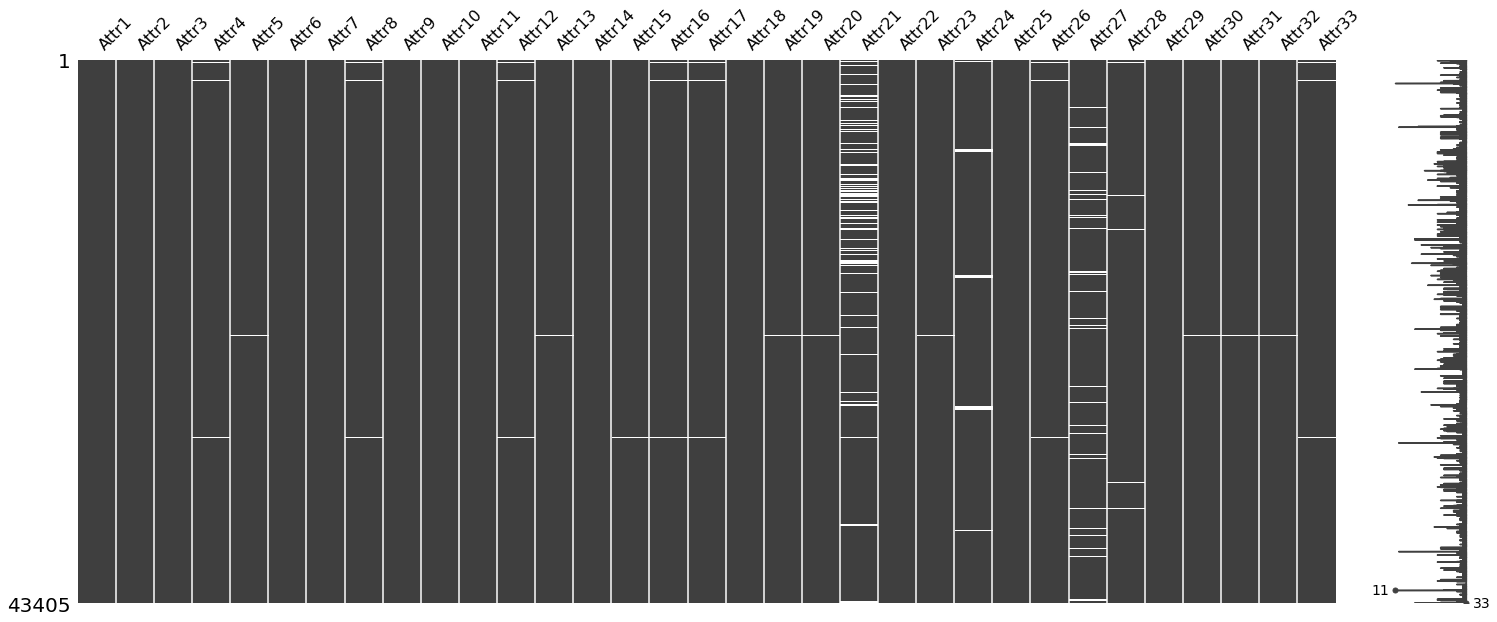

In [15]:
#look at missing values (first 32 features)
msno.matrix(full_df.iloc[:, 0:33])

<AxesSubplot:>

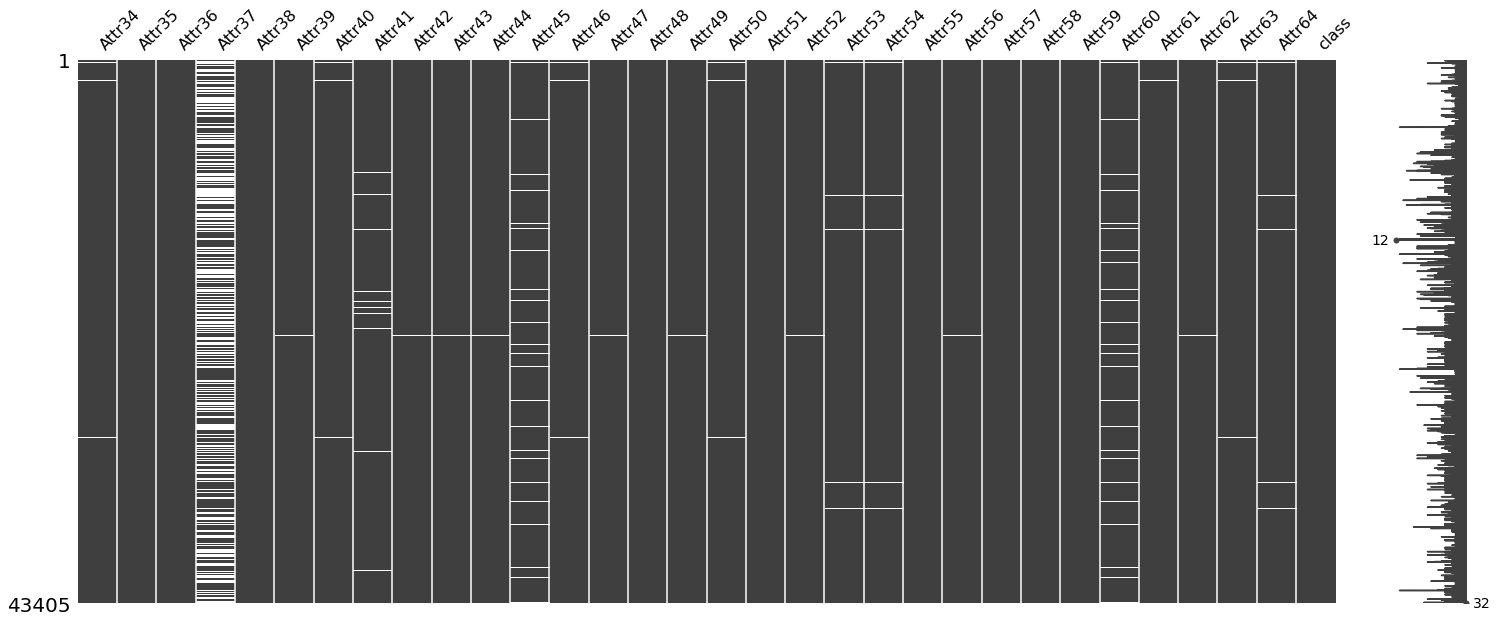

In [16]:
#look at missing values (features X33 to X64 and class)
msno.matrix(full_df.iloc[:, 33:66])

Text(0.5, 1.0, 'HeatMap-Correlation Matrix')

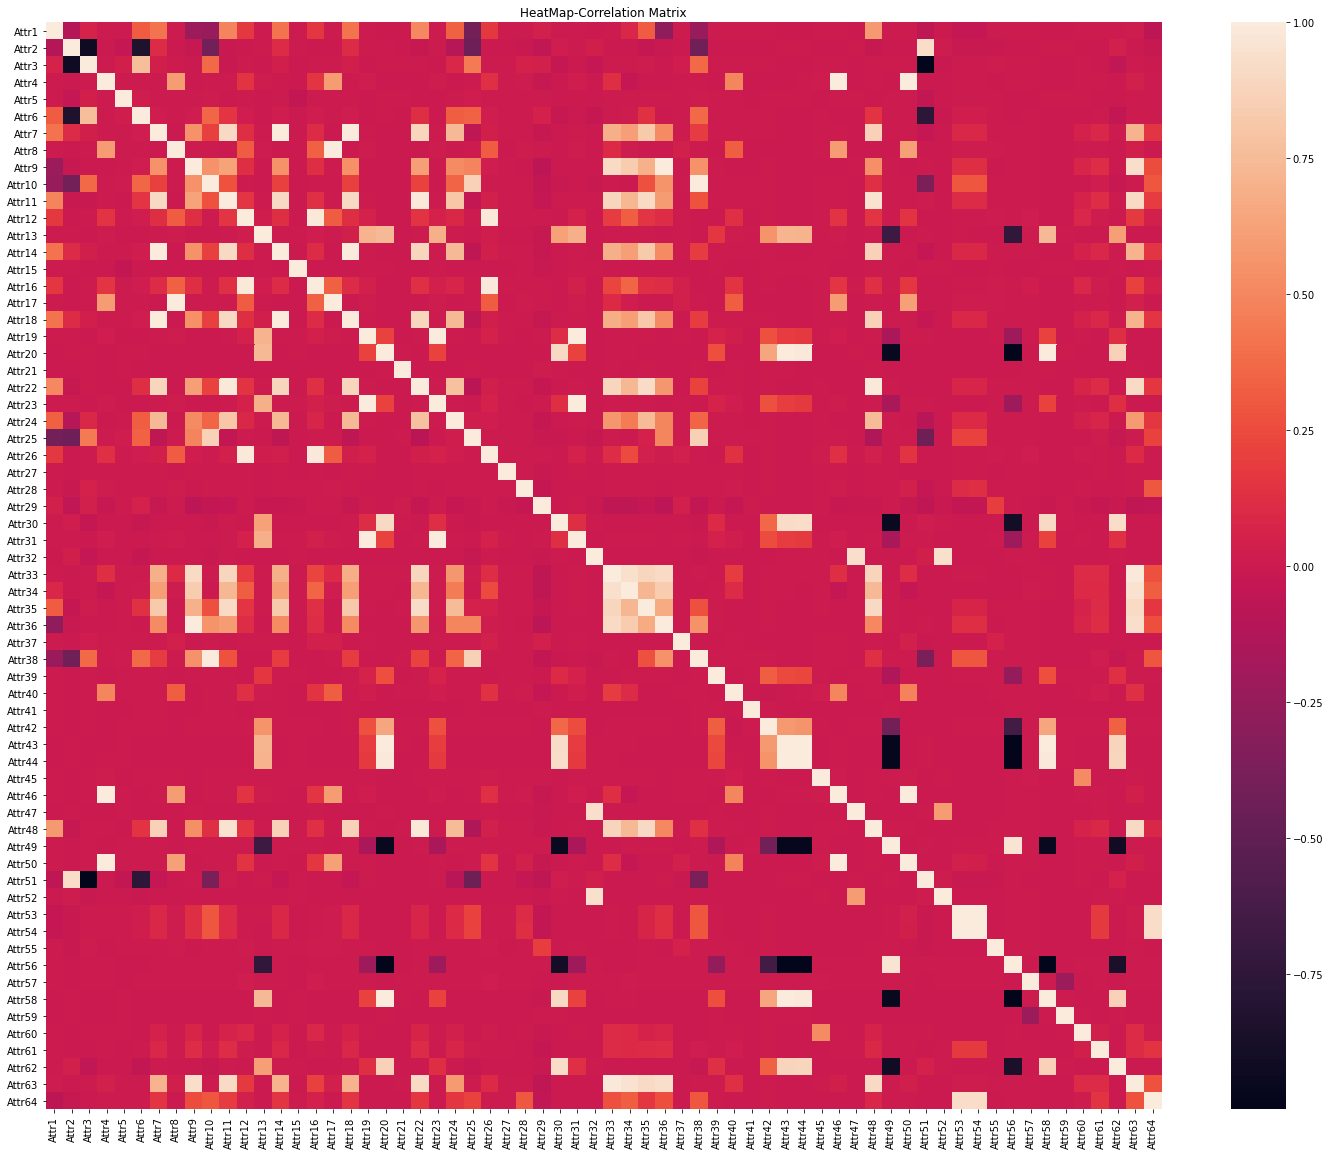

In [17]:
#correlations between features - not necessarily an issue with RF and boosting, but could give insight into potential branches
plt.figure(figsize=(25, 20))
sns.heatmap(full_df.corr(), annot=False)
plt.title('HeatMap-Correlation Matrix')

Two values are maily missing Attr21 and Attr 37. BUt do not see any high coorelation wth any value so immputing from other feature may not be very use. Missing values will be replaced with medium 



In [18]:
## X for explanatory variables and y for the response variable
y = full_df['class']
X = full_df.drop('class', axis=1)
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (43405,)
Size of explanatory matrix:  (43405, 64)


In [19]:
## counting unique values of targets 
print("split between 0 and 1 of binary classes:  \n", '-----------------')
print(y.value_counts())
'''The data looks a bit unbalanced (89:11 split). So, we will use StratifiedKFold to create test and train data'''

split between 0 and 1 of binary classes:  
 -----------------
b'0'    41314
b'1'     2091
Name: class, dtype: int64


'The data looks a bit unbalanced (89:11 split). So, we will use StratifiedKFold to create test and train data'

split between 0 and 1 of binary classes:  
 -----------------
b'0'    41314
b'1'     2091
Name: class, dtype: int64


<AxesSubplot:title={'center':'Bankruptcy Indicator Counts'}>

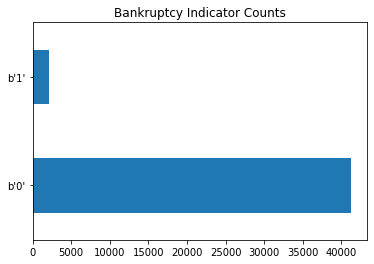

In [23]:
## Check target counts
print("split between 0 and 1 of binary classes:  \n", '-----------------')
print(y.value_counts())

y.value_counts().plot(kind='barh', title='Bankruptcy Indicator Counts')

In [20]:
X.index

RangeIndex(start=0, stop=43405, step=1)

In [21]:
'''#import data
full_df = pd.read_csv("C:\\Paritosh\\SMU\\7333 Quantifying the World\\Proj\\CS4\\full_df.csv")
full_df = full_df.apply(pd.to_numeric, errors='coerce')'''

'#import data\nfull_df = pd.read_csv("C:\\Paritosh\\SMU\\7333 Quantifying the World\\Proj\\CS4\\full_df.csv")\nfull_df = full_df.apply(pd.to_numeric, errors=\'coerce\')'

In [22]:
def strat_shuffle_split(X, y, test_size, random_state):
    stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_index, test_index in stratified_shuffle_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

In [33]:
## Creating training and test data - 20% witholding for test set (stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [ ]:
'''from sklearn.preprocessing import MultiLabelBinarizer  
X_train=MultiLabelBinarizer().fit_transform(X_train)
X_test_imp=MultiLabelBinarizer().fit_transform(X_test)'''
    


In [24]:
# Use median imputation since many features are highly skewed

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(X_train)

X_train_imp = pd.DataFrame( imp_mean.transform(X_train), columns = X.columns, index = X_train.index )
X_test_imp = pd.DataFrame( imp_mean.transform(X_test), columns = X.columns, index = X_test.index )

In [25]:
X_train_imp

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
19844,0.126750,0.111670,0.594480,6.32340,91.9830,0.458410,0.157560,7.90080,1.07550,0.88231,...,26570.00,0.070158,0.143650,0.92984,0.000000,9.3266,5.8410,22.979,15.8840,6.0365
41074,-0.045747,0.547990,0.353430,1.97210,59.1210,0.000000,-0.045747,0.82485,1.80440,0.45201,...,1045.20,-0.070815,-0.101210,1.07360,0.000000,52.5580,3.5945,73.548,4.9627,6.3762
13866,0.013214,0.705070,0.081256,1.12620,935.0000,-0.053123,0.014501,0.41830,1.86370,0.29493,...,3472.20,0.014665,0.044805,0.99672,0.065512,11.4470,3.9907,126.060,2.8955,6.7750
36084,0.070254,0.585060,0.389470,1.66820,-64.5200,-0.010215,0.080989,0.70922,0.86096,0.41494,...,274.35,0.094290,0.169310,0.90607,0.000000,1.6284,2.3636,247.100,1.4772,31.1020
32658,-0.029575,0.546440,-0.098704,0.75235,-98.8580,0.000000,-0.029575,0.83004,1.27750,0.45356,...,-1132.30,-0.001995,-0.065205,1.02310,0.160830,6.8493,25.9670,113.870,3.2053,1.8246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38646,0.155400,0.223500,0.577250,3.80010,121.3600,0.000000,0.195310,3.47430,1.36550,0.77650,...,30514.00,0.132850,0.200130,0.86112,0.006109,7.3979,3.5258,55.104,6.6238,6.3044
35942,0.026766,0.081931,0.551440,7.73050,12.3670,-0.004005,0.034120,11.00400,1.02630,0.90155,...,59681.00,0.025651,0.029689,0.97435,0.000000,4.4133,9.6074,26.561,13.7420,3.0709
7376,0.486900,0.472310,0.527570,2.11700,268.2400,-0.035479,0.597120,1.11720,0.99641,0.52769,...,1383.40,0.602600,0.922700,0.40121,0.000000,4.3595,1.5121,173.020,2.1096,8242.5000
36002,-0.041583,0.526610,0.473390,1.89890,5.8601,0.000000,-0.041583,0.89893,2.55800,0.47339,...,2144.40,-0.012694,-0.087841,1.01620,0.000000,6.0306,4.5039,75.141,4.8575,4.3131


In [26]:
y_train.value_counts(normalize=True)

b'0'    0.951815
b'1'    0.048185
Name: class, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

b'0'    0.951851
b'1'    0.048149
Name: class, dtype: float64

In [28]:
X_train_imp

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
19844,0.126750,0.111670,0.594480,6.32340,91.9830,0.458410,0.157560,7.90080,1.07550,0.88231,...,26570.00,0.070158,0.143650,0.92984,0.000000,9.3266,5.8410,22.979,15.8840,6.0365
41074,-0.045747,0.547990,0.353430,1.97210,59.1210,0.000000,-0.045747,0.82485,1.80440,0.45201,...,1045.20,-0.070815,-0.101210,1.07360,0.000000,52.5580,3.5945,73.548,4.9627,6.3762
13866,0.013214,0.705070,0.081256,1.12620,935.0000,-0.053123,0.014501,0.41830,1.86370,0.29493,...,3472.20,0.014665,0.044805,0.99672,0.065512,11.4470,3.9907,126.060,2.8955,6.7750
36084,0.070254,0.585060,0.389470,1.66820,-64.5200,-0.010215,0.080989,0.70922,0.86096,0.41494,...,274.35,0.094290,0.169310,0.90607,0.000000,1.6284,2.3636,247.100,1.4772,31.1020
32658,-0.029575,0.546440,-0.098704,0.75235,-98.8580,0.000000,-0.029575,0.83004,1.27750,0.45356,...,-1132.30,-0.001995,-0.065205,1.02310,0.160830,6.8493,25.9670,113.870,3.2053,1.8246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38646,0.155400,0.223500,0.577250,3.80010,121.3600,0.000000,0.195310,3.47430,1.36550,0.77650,...,30514.00,0.132850,0.200130,0.86112,0.006109,7.3979,3.5258,55.104,6.6238,6.3044
35942,0.026766,0.081931,0.551440,7.73050,12.3670,-0.004005,0.034120,11.00400,1.02630,0.90155,...,59681.00,0.025651,0.029689,0.97435,0.000000,4.4133,9.6074,26.561,13.7420,3.0709
7376,0.486900,0.472310,0.527570,2.11700,268.2400,-0.035479,0.597120,1.11720,0.99641,0.52769,...,1383.40,0.602600,0.922700,0.40121,0.000000,4.3595,1.5121,173.020,2.1096,8242.5000
36002,-0.041583,0.526610,0.473390,1.89890,5.8601,0.000000,-0.041583,0.89893,2.55800,0.47339,...,2144.40,-0.012694,-0.087841,1.01620,0.000000,6.0306,4.5039,75.141,4.8575,4.3131


In [29]:
X_train_imp.shape

(30383, 64)

In [30]:
X_test_imp.shape

(13022, 64)

In [31]:
#Grid Search for best Random Forest Parameters (gridsearch will use stratified cv by default if cv# is specified)
#code taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def runGridSearchCV(clf_model, tuned_parameters, scores):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            #RandomForestClassifier(class_weight = 'balanced'), tuned_parameters, n_jobs=-1, scoring='%s' % score
            clf_model, tuned_parameters, n_jobs=-1, scoring='%s' % score
        )
        clf.fit(X_train_imp, y_train)

        print("Best parameters set found on training set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on training set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full training set.")
        print("The scores are computed on the full test set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test_imp)
        print(classification_report(y_true, y_pred))
        print()
        return clf

In [32]:
%%time
#run gridsearch for random forest
tuned_parameters = [{
    'bootstrap': [True, False],
    'n_estimators': [200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_depth': [5,6,7,8,9,10,11,12]
}]

scores = ['recall'] 
clf = RandomForestClassifier(class_weight = 'balanced')
clf_rf = runGridSearchCV(clf, tuned_parameters, scores)

# Tuning hyper-parameters for recall



ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

## Random Forest Model

In [ ]:
## split dataset into independent (X) and target (y) variables
y = full_df1['class']
X = full_df1.drop(['class'], axis=1) #dropped 'Company' as this is just observation row#
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

In [ ]:
## Check target counts
print("split between 0 and 1 of binary classes:  \n", '-----------------')
print(y.value_counts())

y.value_counts().plot(kind='barh', title='Bankruptcy Indicator Counts')

In [ ]:
## Creating training and test data - 80-20 split (stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

## Test and train set counts - check that stratification was applied
print('explanatory Training set matrix : ',X_train.shape)
print('explanatory Test set matrix: ',X_test.shape)

print("Training set split between 0 and 1:  \n", '-----------------')
print(y_train.value_counts())

print("Test set split between 0 and 1:  \n", '-----------------')
print(y_test.value_counts())